<a href="https://colab.research.google.com/github/NbtKmy/gc_workshops/blob/main/Netzwerk_Darstellung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netzwerk-Visualisierung

## Einführung

Netzwerk-Visualisierung wird verwendet, um die Beziehungen zwischen Objekten darzustellen. Ein Netzwerk (auch "Graph" bezeichnet) besteht dabei aus Nodes (Knoten) und Edges (Kanten).

### Tools 

Es sind viele Tools für die Visualisierung vorhanden.
Hier sind nur ein Paar Auswahl genannt:


- [**Gephi**](https://gephi.org/): Open Source Software für Netzwerk-Visualisierung und Analyse. 
- [**Gephi Lite**](https://gephi.org/gephi-lite/): Browser-Version von Gephi. Guter Einstieg für Netzwerk-Visualisierung.
- [**igraph**](https://igraph.org/): Open Source Software für Netzwerk-Analyse

Für Python sind ebenso unterschiedliche Libraries für Netzwerk-Visalisierung bzw. Analyse angeboten. Wir benutzen hier die Library [NetworkX](https://networkx.org/). 

### Datenformat

Es gibt viele Datenformate für Netzwerk-Darstellung. Die folgenden 3 Formate sind in vielen Software unterstützt:

- GML
- GraphML
- XGMML




## Einfaches Netzwerk zeichnen

Zum Einstieg zeichnen wir zuerst ein ziemlich einfaches Netzwerk!

In [4]:
# Zuerst NetworkX installieren
!pip install -q networkx matplotlib

In [ ]:
import networkx as nx
graph = nx.Graph()

# Nodes werden als ein Listenobjekt hinzugefügt
graph.add_nodes_from(["A", "B", "C"])
# Edges werden ebenso ein Listenobjekt hinzugefügt. 
# Datei sind die Beziehungen zwischen zwei Nodes als Tuple erfasst
graph.add_edges_from([("A", "B"), ("B", "C"), ("A", "C")])
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")

## Degree (Vernetzungsgrad)

Vernetzungsgrad einer Node bei einem ungerichteten Graph entspricht die Zahl der Edges an der Node. 

Durchschnitt des Vernetungsgrades bei einem ungerichtigegen Graph kann man folgendermassen berechnen:


$$ \frac{\text {Summe der Vernetzungsgrade aller Nodes}}{\text {Zahl der Nodes}} $$



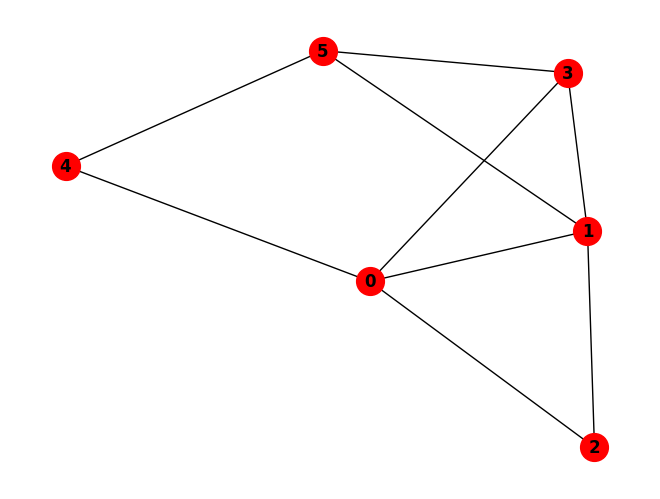

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random

graph = nx.Graph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.sample(nodes, 2))
    edges.append(edge)
graph.add_edges_from(edges)
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")




degree: [(0, 4), (1, 4), (2, 2), (3, 3), (4, 2), (5, 3)]
[0, 0, 2, 2, 2]
average degree:  3.0


<BarContainer object of 5 artists>

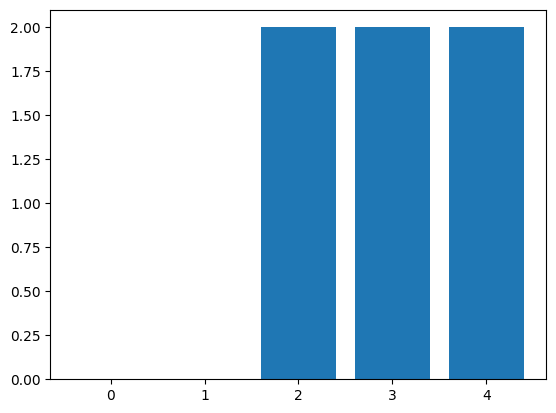

In [15]:
print("degree:", graph.degree())
print(nx.degree_histogram(graph))

# Average Degree berechnen
num_nodes = len(nodes)
sum_degree = 0
for deg in graph.degree():
    sum_degree += deg[1]
print("average degree: ", sum_degree/num_nodes)

bar_num = len(nx.degree_histogram(graph))
plt.bar(range(bar_num), height = nx.degree_histogram(graph))

## Gerichteter Graph

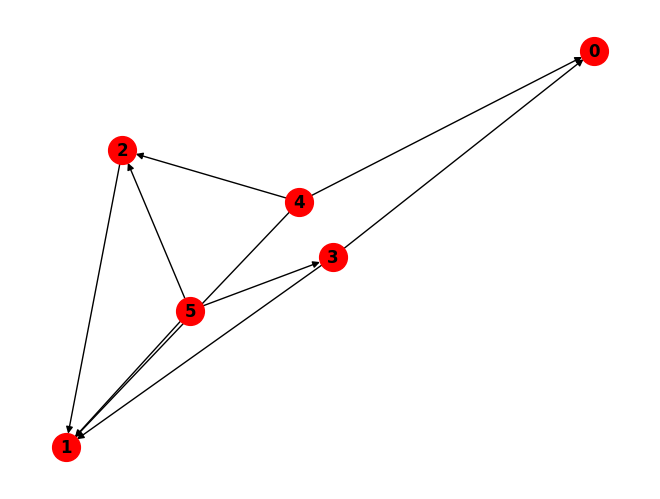

In [16]:
import networkx as nx
import matplotlib.pyplot as plt
import random

graph = nx.DiGraph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.sample(nodes, 2))
    edges.append(edge)
graph.add_edges_from(edges)
nx.draw(graph, node_size=400, node_color="red", with_labels=True, font_weight="bold")

In [20]:
print("in-degree:", graph.in_degree())
# Average In-Degree berechnen
num_nodes = len(nodes)
sum_in_degree = 0
for in_deg in graph.in_degree():
    sum_in_degree += in_deg[1]
print("average in-degree: ", sum_in_degree/num_nodes)

print("out-degree:", graph.out_degree())
# Average Out-Degree berechnen
sum_out_degree = 0
for out_deg in graph.out_degree():
    sum_out_degree += out_deg[1]
print("average out-degree: ", sum_out_degree/num_nodes)


in-degree: [(0, 2), (1, 4), (2, 2), (3, 1), (4, 0), (5, 0)]
average in-degree:  1.5
out-degree: [(0, 0), (1, 0), (2, 1), (3, 2), (4, 3), (5, 3)]
average out-degree:  1.5


## Graph mit Multiedge und self-loop



Counter({(5, 2): 2, (5, 3): 1, (3, 1): 1, (1, 0): 1, (2, 3): 1, (5, 0): 1, (0, 4): 1, (2, 2): 1, (2, 5): 1})


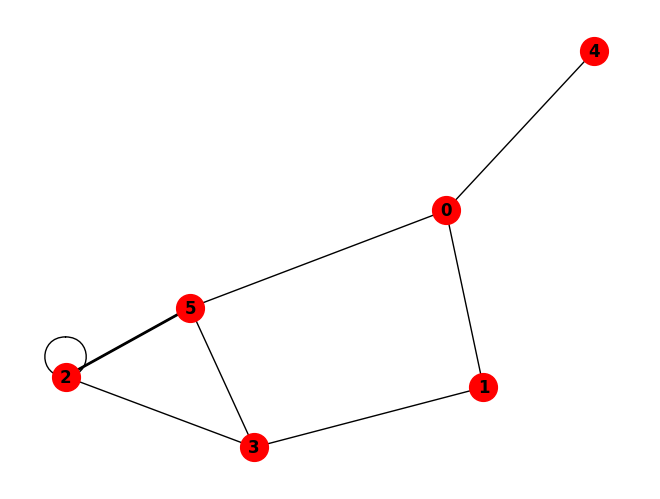

In [35]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import collections

graph = nx.MultiGraph()

nodes = [0, 1, 2, 3, 4, 5]
graph.add_nodes_from(nodes)

edges = []
for i in range(10):
    edge = tuple(random.choices(nodes, k=2))
    edges.append(edge)

# Gewicht(Weight) der einzelnen Edges berechnen 
count_weight = collections.Counter(edges)
print(count_weight)
for e, w in count_weight.items():
    graph.add_edge(e[0], e[1], weight=w)

weights = nx.get_edge_attributes(graph, "weight").values()
nx.draw(graph, node_size=400, node_color="red", width = list(weights), with_labels=True, font_weight="bold")

## Zentralität (Centrality) eines Knoten

- Degree centrality
- Eigenvector centrality
- Katz centrality
- PageRank
- Closeness centrality
- Betweenness centrality

## Andere Darstellungsmöglichkeiten



Saving lesmis.gml to lesmis (1).gml


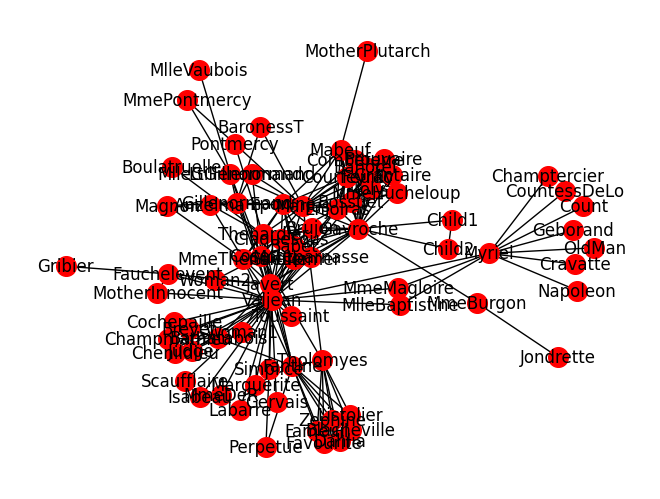

In [37]:
import networkx as nx
from google.colab import files


uploaded = files.upload()
for fn in uploaded.keys():
    G = nx.readwrite.gml.read_gml(fn)
    nx.draw_spring(G, node_size=200, node_color="red", with_labels=True)